In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import StandardScaler # Used for scaling of data
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout

from keras import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from keras import backend as K
from keras.wrappers.scikit_learn import KerasRegressor

Using TensorFlow backend.


In [42]:
df_train = pd.read_csv('./dataSets/Train_set.csv', index_col=0)
df_train.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,H9_3,H9_4,H9_5,H9_6,H9_7,H9_8,H9_9,answer0,answer1,answer2
id,,,,,,,,,,,,,,,,,,,,,
0,-4.213839,-0.662636,1.979481,-5.327352,0.901441,8.190747,12.686650,0.792533,-0.076086,-5.871052,...,0.356221,-1.031861,1.000720,-0.163338,-0.208452,-0.662859,0.148698,0.688612,2.879143,3.053508
1,4.545072,-6.275999,-0.262110,1.122741,-1.420998,-2.842873,-6.340860,-0.481781,7.479086,-4.596997,...,-0.463291,0.339082,-0.752177,-0.643831,-1.139862,-0.305384,0.744983,0.901974,3.679565,4.050779
2,0.571600,-4.057191,4.347883,-1.262799,-4.383437,1.811960,0.105390,1.223012,-1.260808,-3.411802,...,0.943679,-1.158872,-0.680034,-1.087304,-1.081213,-0.049827,0.161791,1.240741,3.659415,4.058696
3,-7.683642,10.526998,6.074484,-1.592945,3.832312,4.712018,-13.358695,-2.554253,-6.613828,5.214856,...,-0.790218,0.866863,1.451118,-0.111390,0.163469,-0.471505,-0.519552,1.396716,4.591284,4.799059
4,6.140893,0.341650,-3.405094,3.030345,5.093734,5.041532,4.507500,-2.197444,-8.195708,-4.707152,...,0.010728,-0.366912,0.307581,-0.385356,-0.144410,-1.003898,-0.648029,1.196405,3.736155,3.962672


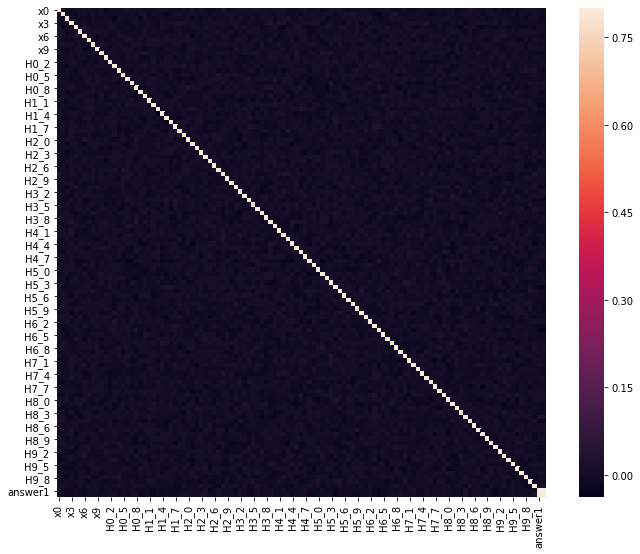

In [43]:
import seaborn as sns
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);
###Data is fully random so there is no corrolation

In [85]:
# df_train = pd.get_dummies(df_train)
# df_train = df_train.fillna(df_train.mean())
# df_train.head()

scale = StandardScaler()
cols = ['answer0','answer1','answer2']
Y = df_train[cols]
X = df_train.drop(['answer0','answer1','answer2'],axis = 1)

X = scale.fit_transform(X)
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

# print(len(X[9999]))

In [189]:
from keras.optimizers import Adam
model = Sequential()
model.add(Dense(256, input_dim=X_train.shape[1], activation='relu'))
# model.add(Dense(64, activation='relu'))
# model.add(Dense(32, activation='relu'))
model.add(Dense(3,activation='linear'))
# Compile model
#
model.compile(Adam(lr = 0.001), loss = 'mean_squared_error', metrics =[metrics.mae])
model.summary()

Model: "sequential_37"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_80 (Dense)             (None, 256)               28416     
_________________________________________________________________
dense_81 (Dense)             (None, 3)                 771       
Total params: 29,187
Trainable params: 29,187
Non-trainable params: 0
_________________________________________________________________


In [190]:
from keras.callbacks import EarlyStopping
earlystopper = EarlyStopping(monitor='val_loss', min_delta=0, patience=25, verbose=1, mode='auto')
# 
history = model.fit(X_train, Y_train, validation_split=0.2, epochs=150,batch_size=20,shuffle=True,callbacks=[earlystopper],verbose=0)

Epoch 00029: early stopping


In [191]:
model.evaluate(X_test, Y_test)
# model.evaluate(X_train, Y_train)

2000/2000 [==============================] - 0s 47us/step


[0.3901676409244537, 0.4675214886665344]

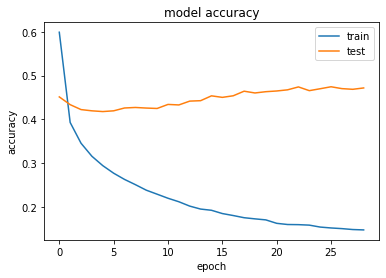

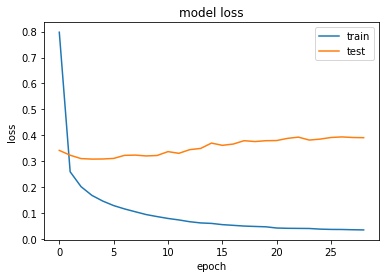

In [192]:
# summarize history for accuracy
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [193]:

predictions = model.predict(X_test[:5])

print(predictions)
print(Y_test[:5])

[[0.79956216 3.6989236  3.3894887 ]
 [0.92844105 2.6089897  2.6995263 ]
 [0.7851044  3.3777432  4.1316166 ]
 [0.8636378  3.0680563  3.6036549 ]
 [0.7037981  3.1295526  3.5386882 ]]
       answer0   answer1   answer2
id                                
9930  1.197992  2.649750  3.204605
2389  1.139177  3.019963  3.974169
9624  0.667899  4.310452  4.515176
7261  0.783713  3.495710  3.671968
6021  1.237004  3.360651  3.455693


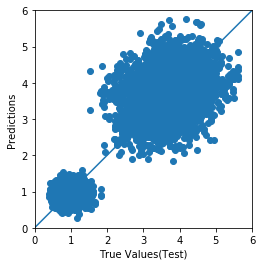

In [194]:
# test_predictions = model.predict(X_train).flatten()

# a = plt.axes(aspect='equal')
# plt.scatter(Y_train, test_predictions)
# plt.xlabel('True Values(Train)')
# plt.ylabel('Predictions')
# lims = [0,6]
# plt.xlim(lims)
# plt.ylim(lims)
# plt.plot(lims, lims)

test_predictions = model.predict(X_test).flatten()

b = plt.axes(aspect='equal')
plt.scatter(Y_test, test_predictions)
plt.xlabel('True Values(Test)')
plt.ylabel('Predictions')
lims = [0,6]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)